# Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# I. Read Data

In [2]:
columns = ["id", "gender", "age", "hypertension", "heart_disease", 
           "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", 
           "smoking_status", "stroke"]

In [3]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv", skiprows=1, names=columns, sep=",", index_col=False, skipinitialspace=True)

In [4]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
stroke_data[["bmi","avg_glucose_level"]].describe()

,bmi,avg_glucose_level
count,5109.000000,5110.000000
mean,28.883255,106.147677
std,7.727254,45.283560
min,10.300000,55.120000
25%,23.700000,77.245000
50%,28.200000,91.885000
75%,32.800000,114.090000
max,97.600000,271.740000


# II. Data Cleaning

## 2.1 Missing values

In [6]:
null_counts = stroke_data.isnull().sum()
print("Number of null:")
print(null_counts)

Number of null:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [7]:
total_rows = stroke_data.shape[0]
missing_percentage = (null_counts/ total_rows) * 100
missing_percentage

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
stroke_data['bmi'] = stroke_data.groupby(['gender', 'age'])['bmi'].transform(
    lambda x: x.fillna(x.median())
)

## 2.2 Duplicate data

In [9]:
duplicate_count = stroke_data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


## 2.3 Inspect unique values

In [10]:
print("\n Unique values in gender column:",stroke_data['gender'].unique())
print("\n Unique values in ever_married column:",stroke_data['ever_married'].unique())
print("\n Unique values in work_type column:",stroke_data['work_type'].unique())
print("\n Unique values in Residence_type column:",stroke_data['Residence_type'].unique())
print("\n Unique values in smoking_status column:",stroke_data['smoking_status'].unique())



 Unique values in gender column: ['Male' 'Female' 'Other']

 Unique values in ever_married column: ['Yes' 'No']

 Unique values in work_type column: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

 Unique values in Residence_type column: ['Urban' 'Rural']

 Unique values in smoking_status column: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [11]:
stroke_data['gender'] = stroke_data['gender'].str.lower()
stroke_data['ever_married'] = stroke_data['ever_married'].str.lower()
stroke_data['work_type'] = stroke_data['work_type'].str.lower()
stroke_data['Residence_type'] = stroke_data['Residence_type'].str.lower()
stroke_data['smoking_status'] = stroke_data['smoking_status'].str.lower()

# III. Exploratory Data Analysis

### 1. Which age groups are most represented in the dataset, and how might this affect the observed stroke patterns?

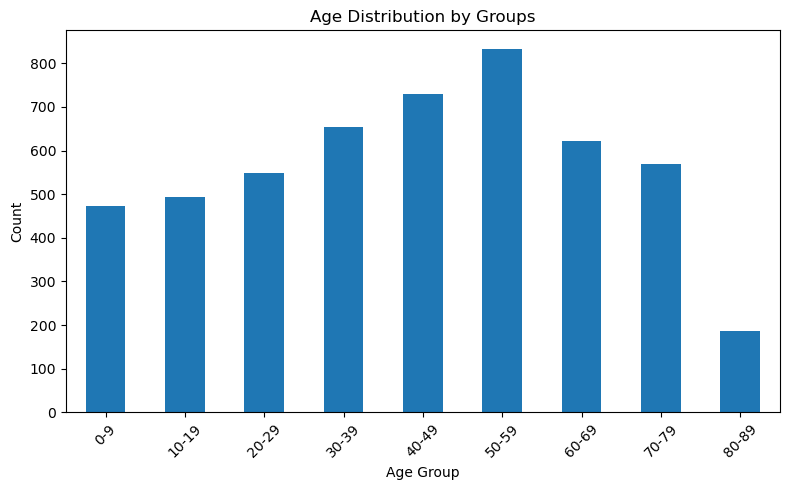

In [12]:
bins = range(0, 100, 10) 
labels = [f"{i}-{i+9}" for i in bins[:-1]]
stroke_data['age_group'] = pd.cut(stroke_data['age'], bins=bins, labels=labels, right=False)

age_counts = stroke_data['age_group'].value_counts().sort_index()

plt.figure(figsize=(8,5))
age_counts.plot(kind='bar')
plt.title("Age Distribution by Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The age distribution by groups shows that the dataset is relatively balanced across younger and middle-aged groups, with the largest proportion of patients in the 50–59 age range, followed by the 40–49 and 30–39 ranges. In contrast, the number of patients in the 80–89 group is considerably smaller, which may limit analysis for the oldest population segment.

### 2.How many people have heart disease? 

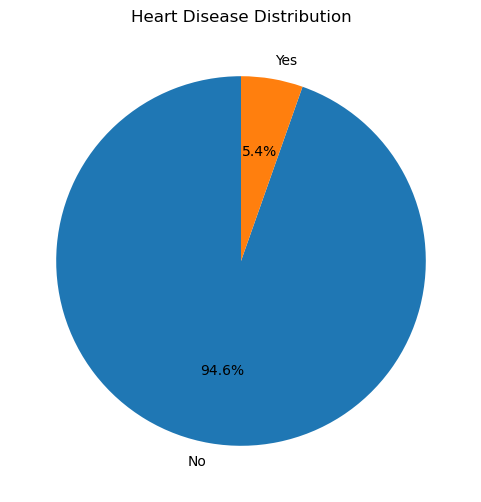

In [ ]:
stroke_data['heart_disease_label'] = stroke_data['heart_disease'].map({1: "Yes", 0: "No"})

counts = stroke_data['heart_disease_label'].value_counts()

plt.figure(figsize=(6,6))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Heart Disease Distribution")
plt.ylabel("") 
plt.show()

### 3.Distribution of average glucose level

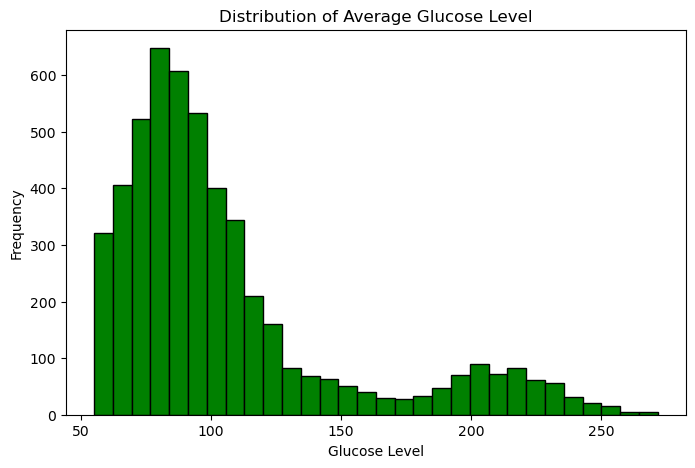

In [14]:
plt.figure(figsize=(8,5))
stroke_data['avg_glucose_level'].plot(kind='hist', bins=30, edgecolor='black',color='green')
plt.title("Distribution of Average Glucose Level")
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.show()

The distribution of average glucose level indicates that most patients have glucose levels between 70 and 120, which is close to the normal range. However, a noticeable subset of patients have very high glucose levels above 200, suggesting possible diabetes cases. The distribution is right-skewed, reflecting the presence of extreme high values.

### 4.Distribution of smoking status

Text(0.5, 1.0, 'Smoking Status Distribution')

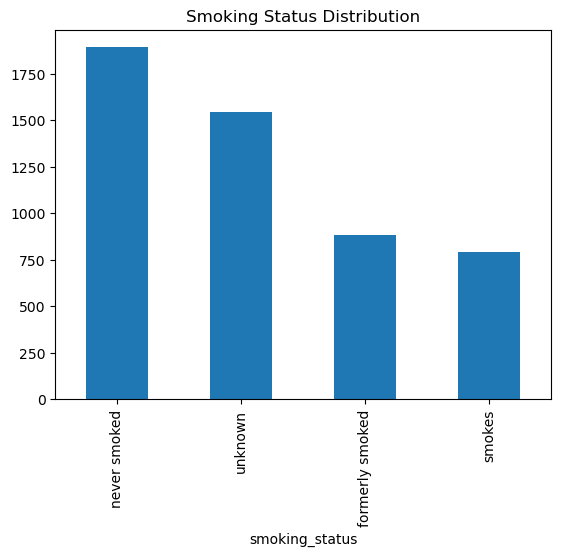

In [15]:
stroke_data['smoking_status'].value_counts().plot(kind='bar')
plt.title("Smoking Status Distribution")

### 5.How does the risk of stroke change across different age groups?

C:\Users\cattu\AppData\Local\Temp\ipykernel_40368\2762167648.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stroke_counts = stroke_data.groupby(['age_group', 'stroke']).size().unstack(fill_value=0)


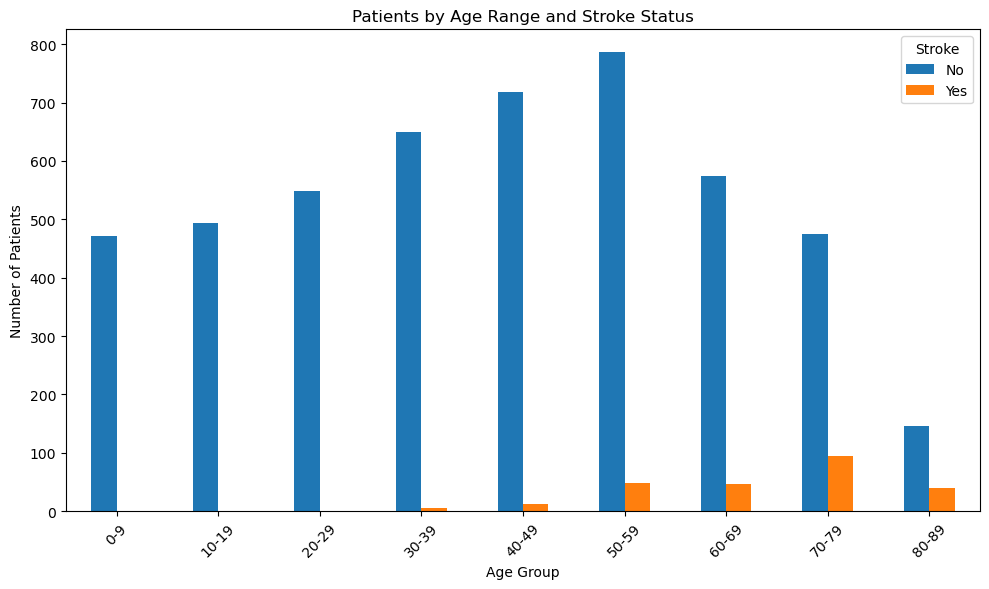

In [16]:
age_stroke_counts = stroke_data.groupby(['age_group', 'stroke']).size().unstack(fill_value=0)

age_stroke_counts.plot(kind='bar', figsize=(10,6))
plt.title("Patients by Age Range and Stroke Status")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.legend(title="Stroke", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

The patients by age range and stroke status graph highlights that while stroke cases are generally rare, they increase significantly with age, particularly among patients aged 60 to 79. Very few strokes occur among individuals under 40. Interestingly, the 70–79 group records one of the highest stroke counts despite having fewer total patients compared to the 50–59 group.